# Cluster countries

Import the required modules.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.base import TransformerMixin
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Problem setting

Let's try to cluster the countries baased on the indicators of happiness.

## Import data

In [2]:
data_2015 = pd.read_csv('Data/world_happiness_2015.csv')

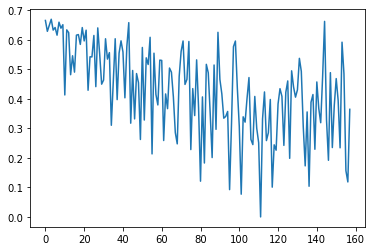

In [9]:
data_2015['Freedom'].plot()

In [10]:
data_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Preprocess data

Define a class to extract data from a pandas DataFrame.

In [11]:
class FeatureSelector(BaseException, TransformerMixin):
    def __init__(self, feature_names):
        self._feature_names = feature_names
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        return X[self._feature_names].values

Define the names of the columns that hold numerical data.

In [12]:
num_attr_names = ['Economy (GDP per Capita)',
                  'Family', 'Health (Life Expectancy)', 'Freedom',
                  'Trust (Government Corruption)', 'Generosity',
                  'Dystopia Residual']

Create a pipeline for the numerical attributes, rescaling them after selection.

In [13]:
num_attrs_pipeline = Pipeline([
    ('select_num_attrs', FeatureSelector(num_attr_names)),
    ('scaler', MinMaxScaler()),
])

Run the pipeline to prepare the data.

In [14]:
prepared_data = num_attrs_pipeline.fit_transform(data_2015)

## Clustering

Create a k-means cluster algorithm for 3 clusters.

In [15]:
clusterer = KMeans(n_clusters=3)

Cluster the data, results will be in `clusterer.labels_`.

In [16]:
clusterer.fit(prepared_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Add the cluster identifier to the original data set.

In [17]:
data_2015['Cluster'] = 0
for i in range(3):
    data_2015.loc[clusterer.labels_ == i, 'Cluster'] = i

In [24]:
#data_2015
clusterer.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [23]:
clusterer.labels_ == i

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

Show the numerical attributes as a box plot for each of the three clusters.

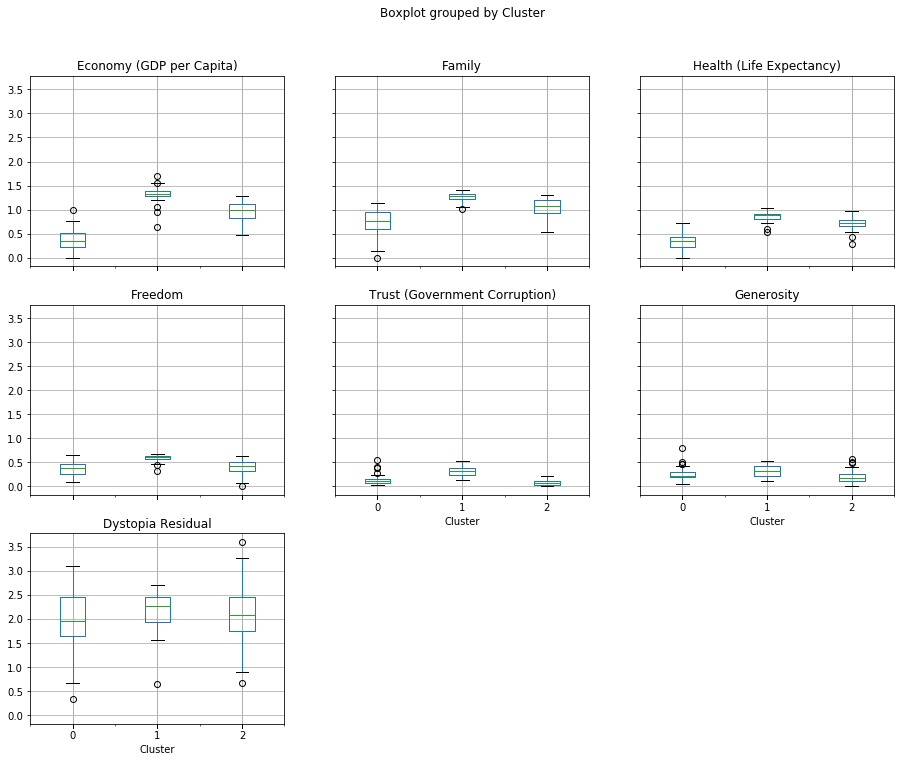

In [25]:
data_2015.boxplot(by='Cluster', column=num_attr_names, figsize=(15, 12));

Show the number of countries in each cluster.

In [26]:
data_2015.loc[:, ('Cluster', 'Country')].groupby('Cluster').count()

,Country
Cluster,
0,50
1,31
2,77


Show countries in cluster 2, which seems the most prosperous.

In [27]:
data_2015.loc[data_2015['Cluster'] == 2, ('Happiness Rank', 'Country')]

,Happiness Rank,Country
10,11,Israel
11,12,Costa Rica
13,14,Mexico
15,16,Brazil
22,23,Venezuela
...,...,...
126,127,Armenia
131,132,Sri Lanka
133,134,Bulgaria
134,135,Egypt


In [31]:
data_2015.loc[data_2015['Cluster'] == 1]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,1
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,1
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,1
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,1
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,1
